Importing the necessary libraries:


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.linalg as lin

from skimage.transform import warp

C:\Users\Varshini\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tkinter import *
from PIL import Image, ImageTk

Q 1)
Implementation Details:

i) Upon running the code, 4 points need to be selected from each image that is displayed on the screen. This has been implemented with the usage of Tkinter library in python. 
ii) Once 4 points are selected from each image, the homography matrix is computed using SVD method where the homography matrix which is assumed to have magnitude 1 is taken to be the V component. 
iii)This homography matrix is then used to transform the coordinates of image 1 to take up the form of image 2.

Defining the relevant functions to be used for implementing the selection of coordinates using tkinter gui:

In [3]:
def get_x_and_y(event):
    global coordinates_1
    global lasx, lasy
    
    lasx, lasy = event.x, event.y
    coordinates_1.append([lasx,lasy])
    print(lasx,lasy)

#coordinates_2=[]
def get_x_and_y1(event):
    global lasx1, lasy1
    global coordinates_2
    lasx1, lasy1 = event.x, event.y
    coordinates_2.append([lasx1,lasy1])
    print(lasx1,lasy1)

coordinates_1=[]

app = Tk()
app.geometry("1200x1200")
canvas = Canvas(app, bg='black')
canvas.pack(anchor='nw', fill='both', expand=1)

canvas.bind("<Button-1>", get_x_and_y)
# canvas = Canvas(app, bg='black')
# canvas.pack(anchor='nw', fill='both', expand=1)

# canvas.bind("<Button-1>", get_x_and_y)
#canvas.bind("<B1-Motion>", draw_smth)
image = Image.open("./images/h1.jpg")
#image = image.resize((400,400), Image.ANTIALIAS)
image = ImageTk.PhotoImage(image,master=app)
canvas.create_image(0,0, image=image, anchor='nw')

app.mainloop()



coordinates_2=[]
#587, 850
app1 = Tk()
app1.geometry("850x587")
canvas1 = Canvas(app1, bg='black')
canvas1.pack(anchor='nw', fill='both', expand=1)

canvas1.bind("<Button-1>", get_x_and_y1)
image1 = Image.open("./images/h2.jpg")
#image1 = image1.resize((600,400), Image.ANTIALIAS)
image1 = ImageTk.PhotoImage(image1,master=app1)
canvas1.create_image(0,0, image=image1, anchor='nw')
app1.mainloop()

69 54
790 38
776 775
53 771
128 185
424 53
637 239
336 378


Q2) Once coordinates have been obtained from selection made by user, they are used for the computation of the homography matrix.
Implementation Details:
i) Computation of Homography matrix using selected coordinates through SVD method. H is taken to be the V component obtained.
ii) Creation of canvas by computing transformation coordinates of the extreme points of the image so that the canvas will able to accomodate all the transformed coordinates that are obtained using the computed Homography Matrix.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


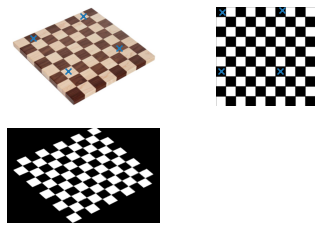

In [4]:
import numpy as np
A = []
b = []
for i in range(len(coordinates_1)):
    s_x, s_y = coordinates_1[i]
    d_x, d_y = coordinates_2[i]
    A.append([s_x, s_y, 1, 0, 0, 0, -(d_x)*(s_x), -(d_x)*(s_y),-d_x])
    A.append([0, 0, 0, s_x, s_y, 1, -(d_y)*(s_x), -(d_y)*(s_y),-d_y])
    b += [d_x, d_y]
A = np.array(A)
#h = np.linalg.lstsq(A, b,rcond=-1)[0]
#h = np.concatenate((h, [1]), axis=-1)

import scipy.linalg as linalg
A = np.array(A)
U, Sigma, V_transpose = linalg.svd(A)

H = np.reshape(V_transpose[-1], (3,3))
#H

#1/V_transpose[8][8]

#H=H/V_transpose[8][8]
#H

f1=plt.imread('./images/h1.jpg')
[h1,w1,d1] = f1.shape
h1,w1,d1

vertex = np.array([[0, 0, 1], [0, h1, 1], [w1, 0, 1], [w1, h1, 1]]);
pos = np.dot(H ,vertex.T); #position of transformed vertices

vertex.T

pos

row=(pos[1,:]/pos[2,:]).astype(int)
col=(pos[0,:]/pos[2,:]).astype(int)

int(row[0])

col

col_min = min(col)
col_max = max(col)
row_min = min(row)
row_max = max(row);

row_max-row_min+1


row_max-row_min+1
col_max-col_min+1

canvas1 = np.zeros([row_max-row_min+1, col_max-col_min+1, 3])
canvas1.shape
plt.imshow(canvas1)

import cv2

import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.linalg as lin

from skimage.transform import warp

# Image read
canvas1 = np.zeros([row_max-row_min+1, col_max-col_min+1, 3])

f1 = plt.imread('./images/h2.jpg') 
f2 = plt.imread('./images/h1.jpg') 

# # Setting matching points in first image
# xy_1 = np.array([[128, 186], [430, 61], [545, 153], [245, 309]])  # x4[3][0], y4[3][1]

# # Setting matching points in second image
# xy_2 = np.array([[136, 90], [910, 54], [926, 643], [166, 669]])  # x'4[3][0], y'4[3][1]

# # Get homography matrix with cv2 module
# #cv2_Homography = cv2.getPerspectiveTransform(xy_1.astype(np.float32), xy_2.astype(np.float32))

# # Make homography matrix
# # Make matrix A
# arrayA = np.array([[xy_1[0][0], xy_1[0][1], 1, 0, 0, 0, -xy_1[0][0] * xy_2[0][0], -xy_1[0][1] * xy_2[0][0]],
#                    [0, 0, 0, xy_1[0][0], xy_1[0][1], 1, -xy_1[0][0] * xy_2[0][1], -xy_1[0][1] * xy_2[0][1]],
#                    [xy_1[1][0], xy_1[1][1], 1, 0, 0, 0, -xy_1[1][0] * xy_2[1][0], -xy_1[1][1] * xy_2[1][0]],
#                    [0, 0, 0, xy_1[1][0], xy_1[1][1], 1, -xy_1[1][0] * xy_2[1][1], -xy_1[1][1] * xy_2[1][1]],
#                    [xy_1[2][0], xy_1[2][1], 1, 0, 0, 0, -xy_1[2][0] * xy_2[2][0], -xy_1[2][1] * xy_2[2][0]],
#                    [0, 0, 0, xy_1[2][0], xy_1[2][1], 1, -xy_1[2][0] * xy_2[2][1], -xy_1[2][1] * xy_2[2][1]],
#                    [xy_1[3][0], xy_1[3][1], 1, 0, 0, 0, -xy_1[3][0] * xy_2[3][0], -xy_1[3][1] * xy_2[3][0]],
#                    [0, 0, 0, xy_1[3][0], xy_1[3][1], 1, -xy_1[3][0] * xy_2[3][1], -xy_1[3][1] * xy_2[3][1]]])
# M_A = np.asmatrix(arrayA)

# # transpose matrix A
# M_At = M_A.T

# # Make matrix b
# arrayB = np.array([[xy_2[0][0]],
#                    [xy_2[0][1]],
#                    [xy_2[1][0]],
#                    [xy_2[1][1]],
#                    [xy_2[2][0]],
#                    [xy_2[2][1]],
#                    [xy_2[3][0]],
#                    [xy_2[3][1]]])
# M_B = np.asmatrix(arrayB)

# # Make homography matrix
# My_Homography = np.asarray((M_At * M_A).I * (M_At * M_B))

# My_Homography_arr = np.array([[My_Homography[0][0], My_Homography[1][0], My_Homography[2][0]],
#                               [My_Homography[3][0], My_Homography[4][0], My_Homography[5][0]],
#                               [My_Homography[6][0], My_Homography[7][0], 1]])

# # My_homography's inverse
# inv_my_homo = lin.inv(My_Homography_arr)

# # Homographic transformation with cv2 module
# # cv2_warped = warp(f2, cv2_Homography, output_shape=(300, 550))

# # Make blank image
#warped = np.zeros((700, 1200, 3), np.float32)

# Make warping source
for y in range(0, 1200):
    for x in range(0, 1200):
        pixel = np.array([x,
                          y,
                          1])

        # Resource_pixel = np.asarray(np.asmatrix(inv_my_homo) * np.asmatrix(pixel))
        #Resource_pixel = np.asarray(np.asmatrix(My_Homography_arr) * np.asmatrix(pixel))
        Resource_pixel = np.asarray(H * np.asmatrix(pixel).T)
        # Coordinate scale
        trans_x = Resource_pixel[0][0] / Resource_pixel[2][0]
        trans_y = Resource_pixel[1][0] / Resource_pixel[2][0]

        # Continue that pixels not matched
#         if (trans_x < 0 or trans_y < 0
#                 or trans_x > f2.shape[0] - 1 or trans_y > f2.shape[1] - 1):
            
# #        if (trans_x < 0 and trans_y < 0
# #                 and trans_x > f2.shape[0] - 1 and trans_y > f2.shape[1] - 1):
#              continue

        # divided by two parts with integer & decimal number
        tx = int(trans_x) -col_min
        ty = int(trans_y) -row_min
        a = trans_x - tx
        b = trans_y - ty
        
        #if tx<canvas1.shape[0] and ty<canvas1.shape[1]:
        canvas1[ty,tx]=f2[x,y]

        # Bilinear Interpolation
#         warped[y][x] = ((((1.0 - a) * (1.0 - b)) * f2[ty][tx])
#                         + ((a * (1.0 - b)) * f2[ty][tx + 1])
#                         + ((a * b) * f2[ty + 1][tx + 1])
#                         + (((1.0 - a) * b) * f2[ty + 1][tx]))

# Image stitch
# M, N = f1.shape[:2]
# f_stitched = np.copy(warped)
#f_stitched[0:M, 0:N, :] = f1

# Plot
plt.subplot(221)
plt.imshow(f1)
plt.axis('off')
coordinates_2=np.array(coordinates_2)
coordinates_1=np.array(coordinates_1)
plt.scatter(coordinates_2[:, 0], coordinates_2[:, 1], marker='x')
plt.subplot(222)
plt.imshow(f2)
plt.axis('off')
plt.scatter(coordinates_1[:, 0], coordinates_1[:, 1], marker='x')
plt.subplot(223)
plt.imshow(canvas1)
plt.axis('off')
#plt.subplot(224)
#plt.imshow(f_stitched)
#plt.axis('off')
plt.show()

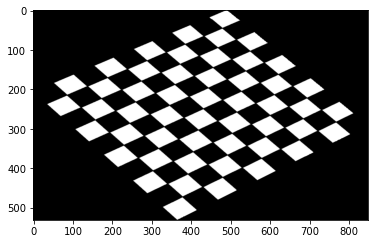

In [5]:
plt.imshow(canvas1/255)

Q3) The inverse of the computed homography matrix from the previous steps can be used to transform coordinates of the second image.
Implementation Details:
i) Interpolating the 2nd image to a larger size to prevent darkening effects during transformation. The coordinates are also scaled accordingly before computation using Homography matrix. 
i) Computation of Homography matrix using selected coordinates of image 1 and the scaled version of scaled coordinates of image 2 through SVD method. H is taken to be the V component obtained. The inverse of this matrix is usd for transformation.
ii) Creation of canvas by computing transformation coordinates of the extreme points of the image so that the canvas will able to accomodate all the transformed coordinates that are obtained using the computed Homography Matrix.

128 185
424 53
637 239
336 378


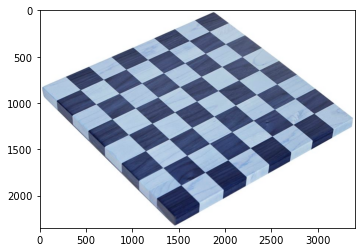

In [6]:
im1=cv2.imread('./images/h2.jpg')
im1_interpolate=cv2.resize(im1,(4*im1.shape[1],4*im1.shape[0]),fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
plt.imshow(im1_interpolate)

coordinates_scaled=[]
for i in coordinates_2:
    print(i[0],i[1])
    coordinates_scaled.append([4*i[0],4*i[1]])
    
import numpy as np
A = []
b = []
for i in range(len(coordinates_1)):
    s_x, s_y = coordinates_1[i]
    d_x, d_y = coordinates_scaled[i]
    A.append([s_x, s_y, 1, 0, 0, 0, -(d_x)*(s_x), -(d_x)*(s_y),-d_x])
    A.append([0, 0, 0, s_x, s_y, 1, -(d_y)*(s_x), -(d_y)*(s_y),-d_y])
    b += [d_x, d_y]
A = np.array(A)
#h = np.linalg.lstsq(A, b,rcond=-1)[0]
#h = np.concatenate((h, [1]), axis=-1)

import scipy.linalg as linalg
A = np.array(A)
U, Sigma, V_transpose = linalg.svd(A)

H = np.reshape(V_transpose[-1], (3,3))
#H

In [7]:
H_inv=linalg.pinv(H)


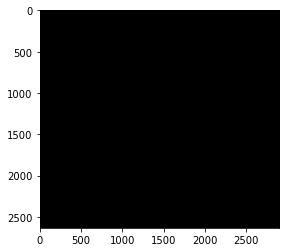

In [8]:
#H_inv=linalg.pinv(H)

# h2,w2=im1_interpolate.shape[0:2]
# h2,w2

# f2=plt.imread('./images/h2.jpg')
# h2,w2=f2.shape[0:2]
# h2,w2

h2,w2=im1_interpolate.shape[0:2]

vertex = np.array([[0, 0, 1], [0, h2, 1], [w2, 0, 1], [w2, h2, 1]]);
pos = np.dot(H_inv ,vertex.T); #position of transformed vertices

row=(pos[1,:]/pos[2,:]).astype(int)
col=(pos[0,:]/pos[2,:]).astype(int)

col_min = min(col)
col_max = max(col)
row_min = min(row)
row_max = max(row);

canvas1 = np.zeros([row_max-row_min+200, col_max-col_min+500, 3])
canvas1.shape
plt.imshow(canvas1)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


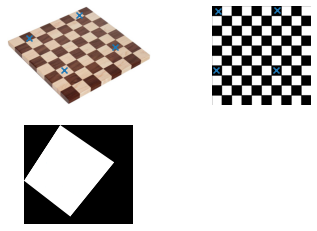

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.linalg as lin

from skimage.transform import warp

# Image read
#canvas1 = np.zeros([row_max-row_min+1, col_max-col_min+1, 3])

f1 = plt.imread('./images/h2.jpg') 
f2 = plt.imread('./images/h1.jpg') 

# # Setting matching points in first image
# xy_1 = np.array([[128, 186], [430, 61], [545, 153], [245, 309]])  # x4[3][0], y4[3][1]

# # Setting matching points in second image
# xy_2 = np.array([[136, 90], [910, 54], [926, 643], [166, 669]])  # x'4[3][0], y'4[3][1]

# # Get homography matrix with cv2 module
# #cv2_Homography = cv2.getPerspectiveTransform(xy_1.astype(np.float32), xy_2.astype(np.float32))

# # Make homography matrix
# # Make matrix A
# arrayA = np.array([[xy_1[0][0], xy_1[0][1], 1, 0, 0, 0, -xy_1[0][0] * xy_2[0][0], -xy_1[0][1] * xy_2[0][0]],
#                    [0, 0, 0, xy_1[0][0], xy_1[0][1], 1, -xy_1[0][0] * xy_2[0][1], -xy_1[0][1] * xy_2[0][1]],
#                    [xy_1[1][0], xy_1[1][1], 1, 0, 0, 0, -xy_1[1][0] * xy_2[1][0], -xy_1[1][1] * xy_2[1][0]],
#                    [0, 0, 0, xy_1[1][0], xy_1[1][1], 1, -xy_1[1][0] * xy_2[1][1], -xy_1[1][1] * xy_2[1][1]],
#                    [xy_1[2][0], xy_1[2][1], 1, 0, 0, 0, -xy_1[2][0] * xy_2[2][0], -xy_1[2][1] * xy_2[2][0]],
#                    [0, 0, 0, xy_1[2][0], xy_1[2][1], 1, -xy_1[2][0] * xy_2[2][1], -xy_1[2][1] * xy_2[2][1]],
#                    [xy_1[3][0], xy_1[3][1], 1, 0, 0, 0, -xy_1[3][0] * xy_2[3][0], -xy_1[3][1] * xy_2[3][0]],
#                    [0, 0, 0, xy_1[3][0], xy_1[3][1], 1, -xy_1[3][0] * xy_2[3][1], -xy_1[3][1] * xy_2[3][1]]])
# M_A = np.asmatrix(arrayA)

# # transpose matrix A
# M_At = M_A.T

# # Make matrix b
# arrayB = np.array([[xy_2[0][0]],
#                    [xy_2[0][1]],
#                    [xy_2[1][0]],
#                    [xy_2[1][1]],
#                    [xy_2[2][0]],
#                    [xy_2[2][1]],
#                    [xy_2[3][0]],
#                    [xy_2[3][1]]])
# M_B = np.asmatrix(arrayB)

# # Make homography matrix
# My_Homography = np.asarray((M_At * M_A).I * (M_At * M_B))

# My_Homography_arr = np.array([[My_Homography[0][0], My_Homography[1][0], My_Homography[2][0]],
#                               [My_Homography[3][0], My_Homography[4][0], My_Homography[5][0]],
#                               [My_Homography[6][0], My_Homography[7][0], 1]])

# # My_homography's inverse
# inv_my_homo = lin.inv(My_Homography_arr)

# # Homographic transformation with cv2 module
# # cv2_warped = warp(f2, cv2_Homography, output_shape=(300, 550))

# # Make blank image
#warped = np.zeros((700, 1200, 3), np.float32)
h2,w2=im1_interpolate.shape[0:2]
# Make warping source
for y in range(0, h2):
    for x in range(0, w2):
        pixel = np.array([x,
                          y,
                          1])

        # Resource_pixel = np.asarray(np.asmatrix(inv_my_homo) * np.asmatrix(pixel))
        #Resource_pixel = np.asarray(np.asmatrix(My_Homography_arr) * np.asmatrix(pixel))
        Resource_pixel = np.asarray(H_inv * np.asmatrix(pixel).T)
        # Coordinate scale
        trans_x = Resource_pixel[0][0] / Resource_pixel[2][0]
        trans_y = Resource_pixel[1][0] / Resource_pixel[2][0]

        # Continue that pixels not matched
#         if (trans_x < 0 or trans_y < 0
#                 or trans_x > f2.shape[0] - 1 or trans_y > f2.shape[1] - 1):
            
# #        if (trans_x < 0 and trans_y < 0
# #                 and trans_x > f2.shape[0] - 1 and trans_y > f2.shape[1] - 1):
#              continue

        # divided by two parts with integer & decimal number
        tx = int(trans_x) -col_min
        ty = int(trans_y) -row_min
        a = trans_x - tx
        b = trans_y - ty
        
        if tx<canvas1.shape[0] and ty<canvas1.shape[1]:
            canvas1[ty,tx]=im1_interpolate[y,x]

        # Bilinear Interpolation
#         warped[y][x] = ((((1.0 - a) * (1.0 - b)) * f2[ty][tx])
#                         + ((a * (1.0 - b)) * f2[ty][tx + 1])
#                         + ((a * b) * f2[ty + 1][tx + 1])
#                         + (((1.0 - a) * b) * f2[ty + 1][tx]))

# Image stitch
# M, N = f1.shape[:2]
# f_stitched = np.copy(warped)
#f_stitched[0:M, 0:N, :] = f1

# Plot
plt.subplot(221)
plt.imshow(f1)
plt.axis('off')
coordinates_2=np.array(coordinates_2)
coordinates_1=np.array(coordinates_1)
plt.scatter(coordinates_2[:, 0], coordinates_2[:, 1], marker='x')
plt.subplot(222)
plt.imshow(f2)
plt.axis('off')
plt.scatter(coordinates_1[:, 0], coordinates_1[:, 1], marker='x')
plt.subplot(223)
plt.imshow(canvas1)
plt.axis('off')
#plt.subplot(224)
#plt.imshow(f_stitched)
#plt.axis('off')
plt.show()


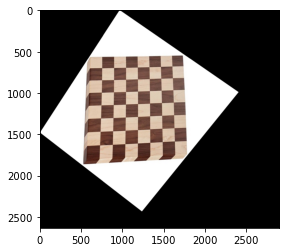

In [10]:
plt.imshow(cv2.cvtColor(np.float32(canvas1/255), cv2.COLOR_BGR2RGB))

In [ ]:
H_inv=linalg.pinv(H)

h2,w2=im1_interpolate.shape[0:2]
h2,w2

f2=plt.imread('./images/h2.jpg')
h2,w2=f2.shape[0:2]
h2,w2

vertex = np.array([[0, 0, 1], [0, h2, 1], [w2, 0, 1], [w2, h2, 1]]);
pos = np.dot(H_inv ,vertex.T); #position of transformed vertices

row=(pos[1,:]/pos[2,:]).astype(int)
col=(pos[0,:]/pos[2,:]).astype(int)

col_min = min(col)
col_max = max(col)
row_min = min(row)
row_max = max(row);

canvas1 = np.zeros([row_max-row_min+500, col_max-col_min+500, 3])
canvas1.shape
plt.imshow(canvas1)

In [53]:
def get_x_and_y(event):
    global coordinates_1
    global lasx, lasy
    
    lasx, lasy = event.x, event.y
    coordinates_1.append([lasx,lasy])
    print(lasx,lasy)

#coordinates_2=[]
def get_x_and_y1(event):
    global lasx1, lasy1
    global coordinates_2
    lasx1, lasy1 = event.x, event.y
    coordinates_2.append([lasx1,lasy1])
    print(lasx1,lasy1)

In [455]:
# img=cv2.imread("simpsons.jpg")
# img1=cv2.resize(img,(400,600))
# cv2.imwrite('simpsons_resize.jpg',img1)

True

Q4) Implementation Details:
i) The image to be stitched is loaded through the GUI wherein 4 relevant points are selected. The same is followed for the 2nd image as well. 
ii) Once coordinates are selected from both images, homography matrix is computed using the selected coordinates. 
iii) The 2nd image to which the 1st image is to be stitched is considered to be the canvas. The transformed coordinates using homography matrix on the 1st image are in turn placed upon this canvas comprising of the 2nd image.

Selection of Coordinates by user:

In [54]:
coordinates_1=[]

app = Tk()
app.geometry("400x600")
canvas = Canvas(app, bg='black')
canvas.pack(anchor='nw', fill='both', expand=1)

canvas.bind("<Button-1>", get_x_and_y)
# canvas = Canvas(app, bg='black')
# canvas.pack(anchor='nw', fill='both', expand=1)

# canvas.bind("<Button-1>", get_x_and_y)
#canvas.bind("<B1-Motion>", draw_smth)
image = Image.open("simpsons_resize.jpg")
#image = image.resize((1500,1000), Image.ANTIALIAS)
image = ImageTk.PhotoImage(image,master=app)
canvas.create_image(0,0, image=image, anchor='nw')

app.mainloop()


27 551
18 13
373 15
375 567


In [55]:
img1=plt.imread('bus.jpg')
img1.shape

(719, 1080, 3)

In [57]:
coordinates_2=[]
#587, 850
app1 = Tk()
app1.geometry("1080x719")
canvas1 = Canvas(app1, bg='black')
canvas1.pack(anchor='nw', fill='both', expand=1)

canvas1.bind("<Button-1>", get_x_and_y1)
image1 = Image.open("bus.jpg")
#image1 = image1.resize((600,400), Image.ANTIALIAS)
image1 = ImageTk.PhotoImage(image1,master=app1)
canvas1.create_image(0,0, image=image1, anchor='nw')
app1.mainloop()

608 489
600 233
788 240
792 449


In [34]:
img.shape

NameError: name 'img' is not defined

In [104]:
h1,w1=img.shape[0:2]

In [59]:
coordinates_1=[[0, 0], [0, h1], [w1, 0], [w1, h1]]

Generating Homography Matrix

In [58]:
import numpy as np
A = []
b = []
for i in range(len(coordinates_1)):
    s_x, s_y = coordinates_1[i]
    d_x, d_y = coordinates_2[i]
    A.append([s_x, s_y, 1, 0, 0, 0, -(d_x)*(s_x), -(d_x)*(s_y),-d_x])
    A.append([0, 0, 0, s_x, s_y, 1, -(d_y)*(s_x), -(d_y)*(s_y),-d_y])
    b += [d_x, d_y]
A = np.array(A)
#h = np.linalg.lstsq(A, b,rcond=-1)[0]
#h = np.concatenate((h, [1]), axis=-1)

import scipy.linalg as linalg
A = np.array(A)
U, Sigma, V_transpose = linalg.svd(A)

H = np.reshape(V_transpose[-1], (3,3))
H

array([[ 1.78314638e-03, -1.21172654e-05,  9.33190001e-01],
       [ 3.11085610e-04,  7.55210118e-04,  3.59374532e-01],
       [ 1.18192914e-06, -2.99802992e-08,  1.58766354e-03]])

In [28]:
#1/V_transpose[8][8]

183.26856297214044

In [10]:
# H=H/V_transpose[8][8]
# H

array([[ 5.70831109e-01,  3.82142659e-01, -1.11917010e+01],
       [-2.26143217e-01,  3.79236403e-01,  1.82921965e+02],
       [ 1.09342699e-04, -6.64682102e-05,  1.00000000e+00]])

In [59]:
f1=plt.imread('simpsons_resize.jpg')
[h1,w1,d1] = f1.shape
h1,w1,d1

(600, 400, 3)

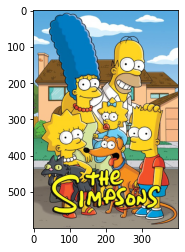

In [659]:
plt.imshow(f1)

In [60]:
vertex = np.array([[0, 0, 1], [0, h1, 1], [w1, 0, 1], [w1, h1, 1]]);
pos = np.dot(H ,vertex.T); #position of transformed vertices

In [61]:
vertex.T

array([[  0,   0, 400, 400],
       [  0, 600,   0, 600],
       [  1,   1,   1,   1]])

In [62]:
pos

array([[9.33190001e-01, 9.25919642e-01, 1.64644855e+00, 1.63917819e+00],
       [3.59374532e-01, 8.12500603e-01, 4.83808776e-01, 9.36934847e-01],
       [1.58766354e-03, 1.56967536e-03, 2.06043519e-03, 2.04244701e-03]])

In [63]:
row=(pos[1,:]/pos[2,:]).astype(int)
col=(pos[0,:]/pos[2,:]).astype(int)

In [64]:
int(row[0])

226

In [65]:
col_max

1620

In [66]:
col_min = min(col)
col_max = max(col)
row_min = min(row)
row_max = max(row);

In [67]:
row_min

226

In [68]:
row_max


517

In [69]:
row_max-row_min+1
col_max-col_min+1

216

In [70]:
col_max

802

In [71]:
col_min

587

In [72]:
if col_min>1:
    col_min=1
if row_min>1:
    row_min=1

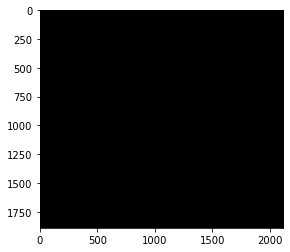

In [49]:
# canvas1 = np.zeros([row_max-row_min+500, col_max-col_min+500, 3])
# canvas1.shape
# plt.imshow(canvas1)

Setting 2nd image to be the canvas:

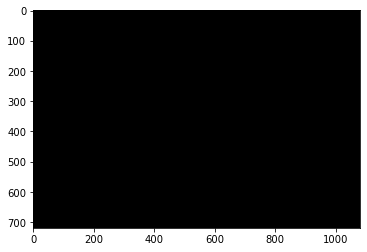

In [76]:
f2 = plt.imread('bus.jpg') 

canvas1 = np.zeros([f2.shape[0], f2.shape[1], 3])
canvas1.shape
plt.imshow(canvas1)

In [77]:
f2 = plt.imread('bus.jpg') 
for y in range(0,f2.shape[0]):
    
    for x in range(0,f2.shape[1]):
        
        tx2 = x
        ty2 = y
        if tx2>0 and ty2>0 and ty2<canvas1.shape[0] and tx2<canvas1.shape[1]:
            canvas1[ty2,tx2] = f2[y,x]

In [630]:
# for y in range(0,f2.shape[0]):
    
#     for x in range(0,f2.shape[1]):
        
#         tx2 = x-col_min
#         ty2 = y-row_min
#         if tx2>0 and ty2>0 and ty2<canvas1.shape[0] and tx2<canvas1.shape[1]:
#             canvas1[ty2,tx2] = f2[y,x]

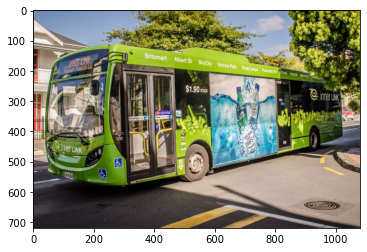

In [78]:
plt.imshow(canvas1/255)

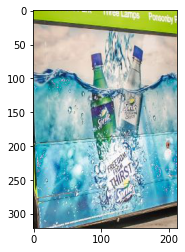

In [657]:
# plt.imshow(canvas1[189:510,586:798]/255)

Applying homography matrix to transform coordinates of 1st image and stitch to advertisement area of 2nd image:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


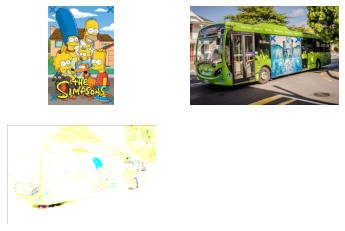

In [79]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.linalg as lin

from skimage.transform import warp

# Image read
#canvas1 = np.zeros([row_max-row_min+1, col_max-col_min+1, 3])

f1 = plt.imread('simpsons_resize.jpg') 
f2 = plt.imread('bus.jpg') 

# # Setting matching points in first image
# xy_1 = np.array([[128, 186], [430, 61], [545, 153], [245, 309]])  # x4[3][0], y4[3][1]

# # Setting matching points in second image
# xy_2 = np.array([[136, 90], [910, 54], [926, 643], [166, 669]])  # x'4[3][0], y'4[3][1]

# # Get homography matrix with cv2 module
# #cv2_Homography = cv2.getPerspectiveTransform(xy_1.astype(np.float32), xy_2.astype(np.float32))

# # Make homography matrix
# # Make matrix A
# arrayA = np.array([[xy_1[0][0], xy_1[0][1], 1, 0, 0, 0, -xy_1[0][0] * xy_2[0][0], -xy_1[0][1] * xy_2[0][0]],
#                    [0, 0, 0, xy_1[0][0], xy_1[0][1], 1, -xy_1[0][0] * xy_2[0][1], -xy_1[0][1] * xy_2[0][1]],
#                    [xy_1[1][0], xy_1[1][1], 1, 0, 0, 0, -xy_1[1][0] * xy_2[1][0], -xy_1[1][1] * xy_2[1][0]],
#                    [0, 0, 0, xy_1[1][0], xy_1[1][1], 1, -xy_1[1][0] * xy_2[1][1], -xy_1[1][1] * xy_2[1][1]],
#                    [xy_1[2][0], xy_1[2][1], 1, 0, 0, 0, -xy_1[2][0] * xy_2[2][0], -xy_1[2][1] * xy_2[2][0]],
#                    [0, 0, 0, xy_1[2][0], xy_1[2][1], 1, -xy_1[2][0] * xy_2[2][1], -xy_1[2][1] * xy_2[2][1]],
#                    [xy_1[3][0], xy_1[3][1], 1, 0, 0, 0, -xy_1[3][0] * xy_2[3][0], -xy_1[3][1] * xy_2[3][0]],
#                    [0, 0, 0, xy_1[3][0], xy_1[3][1], 1, -xy_1[3][0] * xy_2[3][1], -xy_1[3][1] * xy_2[3][1]]])
# M_A = np.asmatrix(arrayA)

# # transpose matrix A
# M_At = M_A.T

# # Make matrix b
# arrayB = np.array([[xy_2[0][0]],
#                    [xy_2[0][1]],
#                    [xy_2[1][0]],
#                    [xy_2[1][1]],
#                    [xy_2[2][0]],
#                    [xy_2[2][1]],
#                    [xy_2[3][0]],
#                    [xy_2[3][1]]])
# M_B = np.asmatrix(arrayB)

# # Make homography matrix
# My_Homography = np.asarray((M_At * M_A).I * (M_At * M_B))

# My_Homography_arr = np.array([[My_Homography[0][0], My_Homography[1][0], My_Homography[2][0]],
#                               [My_Homography[3][0], My_Homography[4][0], My_Homography[5][0]],
#                               [My_Homography[6][0], My_Homography[7][0], 1]])

# # My_homography's inverse
# inv_my_homo = lin.inv(My_Homography_arr)

# # Homographic transformation with cv2 module
# # cv2_warped = warp(f2, cv2_Homography, output_shape=(300, 550))

# # Make blank image
#warped = np.zeros((700, 1200, 3), np.float32)

# Make warping source
for y in range(0, h1):
    for x in range(0, w1):
        pixel = np.array([x,
                          y,
                          1])

        # Resource_pixel = np.asarray(np.asmatrix(inv_my_homo) * np.asmatrix(pixel))
        #Resource_pixel = np.asarray(np.asmatrix(My_Homography_arr) * np.asmatrix(pixel))
        Resource_pixel = np.asarray(H * np.asmatrix(pixel).T)
        # Coordinate scale
        trans_x = Resource_pixel[0][0] / Resource_pixel[2][0]
        trans_y = Resource_pixel[1][0] / Resource_pixel[2][0]

        # Continue that pixels not matched
#         if (trans_x < 0 or trans_y < 0
#                 or trans_x > f2.shape[0] - 1 or trans_y > f2.shape[1] - 1):
            
# #        if (trans_x < 0 and trans_y < 0
# #                 and trans_x > f2.shape[0] - 1 and trans_y > f2.shape[1] - 1):
#              continue

        # divided by two parts with integer & decimal number
        tx = int(trans_x) 
        ty = int(trans_y) 
        a = trans_x - tx
        b = trans_y - ty
        #print(tx,ty)
        #if tx>0 and ty>0 and tx<canvas1.shape[0] and ty<canvas1.shape[1]:
        canvas1[ty,tx]=f1[y,x]

        # Bilinear Interpolation
#         warped[y][x] = ((((1.0 - a) * (1.0 - b)) * f2[ty][tx])
#                         + ((a * (1.0 - b)) * f2[ty][tx + 1])
#                         + ((a * b) * f2[ty + 1][tx + 1])
#                         + (((1.0 - a) * b) * f2[ty + 1][tx]))

# Image stitch
# M, N = f1.shape[:2]
# f_stitched = np.copy(warped)
#f_stitched[0:M, 0:N, :] = f1

# Plot
plt.subplot(221)
plt.imshow(f1)
plt.axis('off')
coordinates_2=np.array(coordinates_2)
coordinates_1=np.array(coordinates_1)
plt.scatter(coordinates_1[:, 0], coordinates_1[:, 1], marker='x')
plt.subplot(222)
plt.imshow(f2)
plt.axis('off')
plt.scatter(coordinates_2[:, 0], coordinates_2[:, 1], marker='x')
plt.subplot(223)
plt.imshow(canvas1)
plt.axis('off')
#plt.subplot(224)
#plt.imshow(f_stitched)
#plt.axis('off')
plt.show()

In [670]:
# canvas1.shape[1]

1080

Displaying the new image after stitching:

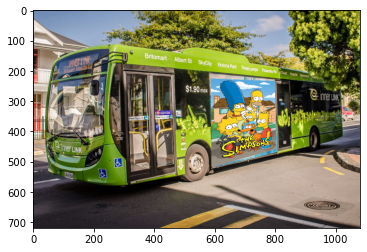

In [80]:
plt.imshow(canvas1/255)